<a href="https://colab.research.google.com/github/Pang-Sujaree/cs352-264-s0341/blob/main/6209610341_CS352_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important functions 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')
df_busline = pd.read_csv('/content/gdrive/MyDrive/CS352/bus_line.csv',delimiter = ',')
df_busline.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,เขต,จำนวนรถเมล์ที่ผ่าน,จำนวนต้นทาง,จำนวนปลายทาง,ประชากร,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน
0,พระนคร,58,6,32,43062,5.536,7778.540462,717.700000,40,17
1,จตุจักร,57,6,20,154146,32.908,4684.149751,2569.100000,38,17
2,ราชเทวี,64,7,15,67735,7.126,9505.332585,996.102941,47,14
3,ปทุมวัน,46,6,12,41763,8.369,4990.201936,835.260000,33,13
4,ดุสิต,39,3,9,81494,10.665,7641.256446,1987.658537,27,11


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
df_location = pd.read_csv('/content/gdrive/MyDrive/CS352/location.csv',delimiter = ',')
df_location.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,เขต,สะพานลอยคนเดินข้าม,ป้ายรถโดยสารประจำทาง,สวนสาธารณะ,ตึก/อาคาร/บ้านสำหรับที่พักอาศัย,ที่ดิน(ว่างเปล่า),สะพาน,ถนน,ทางเท้า,ตรอก/ซอย,...,สถานศึกษา,สถานที่ราชการ,จุดตัดทางแยก,ท่าเรือ,ทางเดินริมน้ำ,สถานีรถไฟฟ้า,อุโมงค์ลอดข้ามทางแยก/ถนน,สถานีขนส่ง,ศาสนสถาน,รวม (จุด)
0,วัฒนา,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,2
1,ธนบุรี,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ทวีวัฒนา,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,3
3,มีนบุรี,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,4
4,วังทองหลาง,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,4


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
df_environment = pd.read_csv('/content/gdrive/MyDrive/CS352/environment.csv',delimiter = ',')
df_environment.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,เขต,เปลี่ยวช่วงกลางคืน,เปลี่ยวช่วงกลางวัน,จุดอับสายตา,รกร้าง,สกปรก,โครงสร้างมีสภาพชำรุด,ไฟชำรุด,วัสดุอุปกรณ์/รถจอดขวางทางสัญจร,คนไร้บ้าน,...,อุบัติเหตุจากป้าย,อุบัติเหตุจากต้นไม้,อุบัติเหตุอื่น ๆ,ก่อกวน/ยกพวกตีกัน/แข่งรถ,ประชาชนพลุกพล่าน,ภัยอันตรายจากสัตว์มีพิษ,สถานที่สำคัญ,ภัยอันตราย/คุกคามทางเพศ,แหล่งสะสมเชื้อโรค,รวม
0,วัฒนา,2,0,1,2,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,8
1,ธนบุรี,0,0,3,0,3,1,3,1,2,...,0,0,0,0,1,0,0,0,0,17
2,ทวีวัฒนา,4,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,มีนบุรี,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,วังทองหลาง,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,11


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
df_food = pd.read_csv('/content/gdrive/MyDrive/CS352/food.csv',delimiter = ',')
df_food.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด,รวม
0,1,วัฒนา,81382,12.565,16,1195,24,127,0,6,"1,352"
1,2,ปทุมวัน,41763,8.369,17,1027,12,74,72,1,"1,186"
2,3,จตุจักร,154146,32.908,41,792,7,172,0,5,976
3,4,คลองเตย,91636,12.994,39,697,11,61,79,1,849
4,5,บางรัก,45015,5.536,15,597,7,57,98,1,760


In [7]:
mpl.__version__

'3.2.2'

In [8]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [9]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=12)
plt = mpl.pyplot

In [10]:
df_food['สัดส่วนประชากร'] = df_food['ประชากร'] /df_food['จำนวนชุมชน']

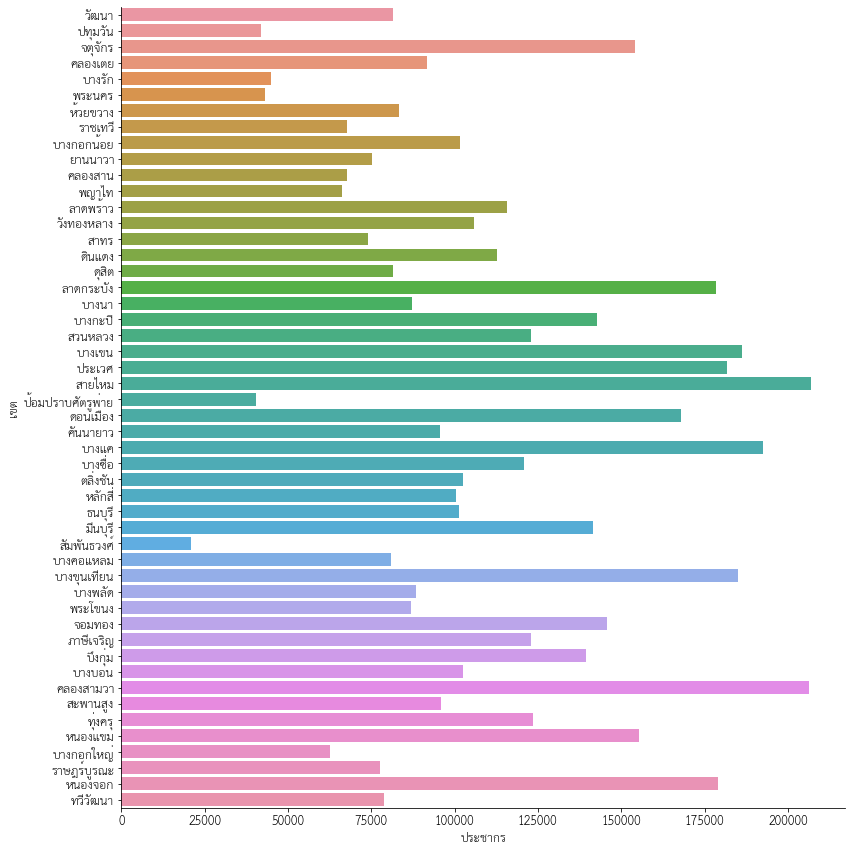

In [11]:
sns.factorplot(x="ประชากร", y="เขต", data = df_food, kind = 'bar', size=12, aspect=1.0)

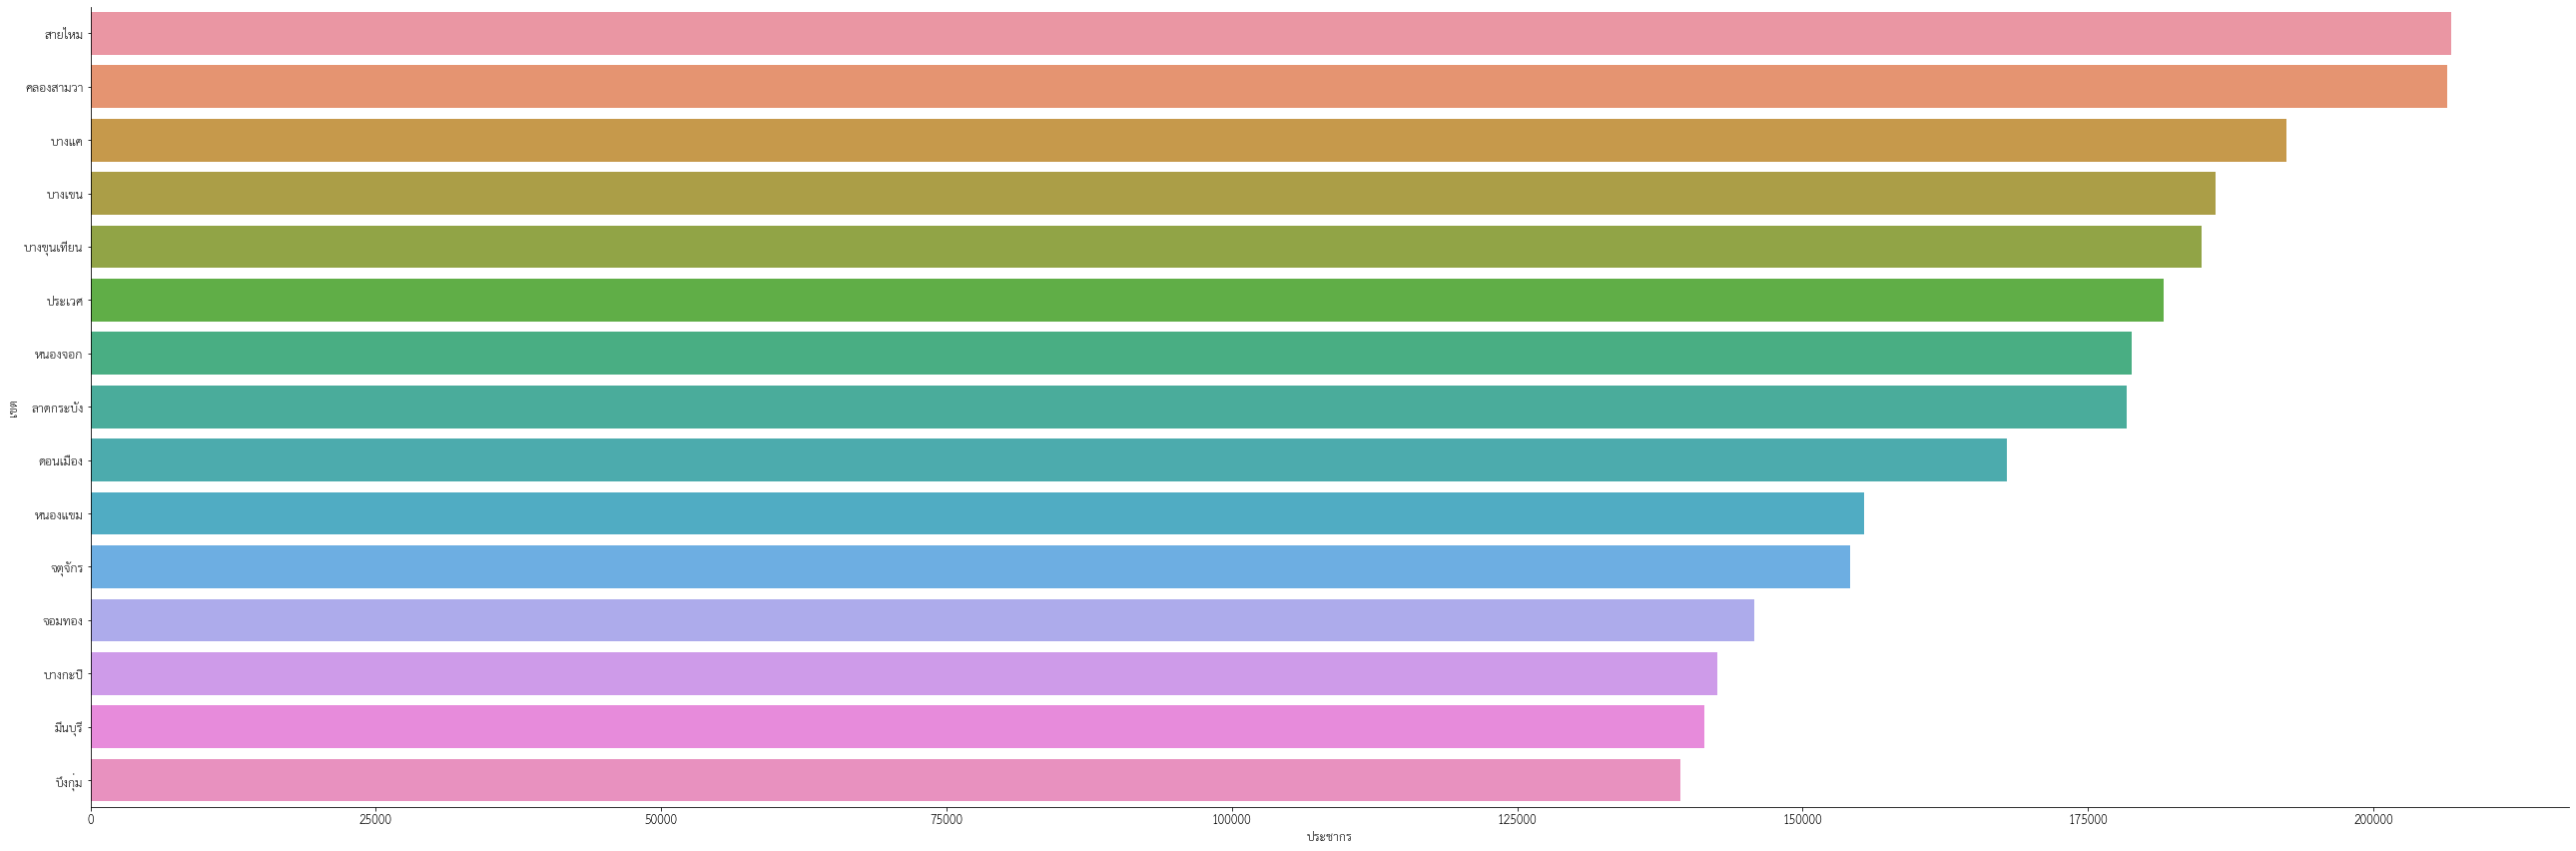

In [18]:
sns.factorplot(x="ประชากร", y="เขต", data = df_food.sort_values('ประชากร', ascending=False).iloc[0:15], kind = 'bar', size=12, aspect=3.0)

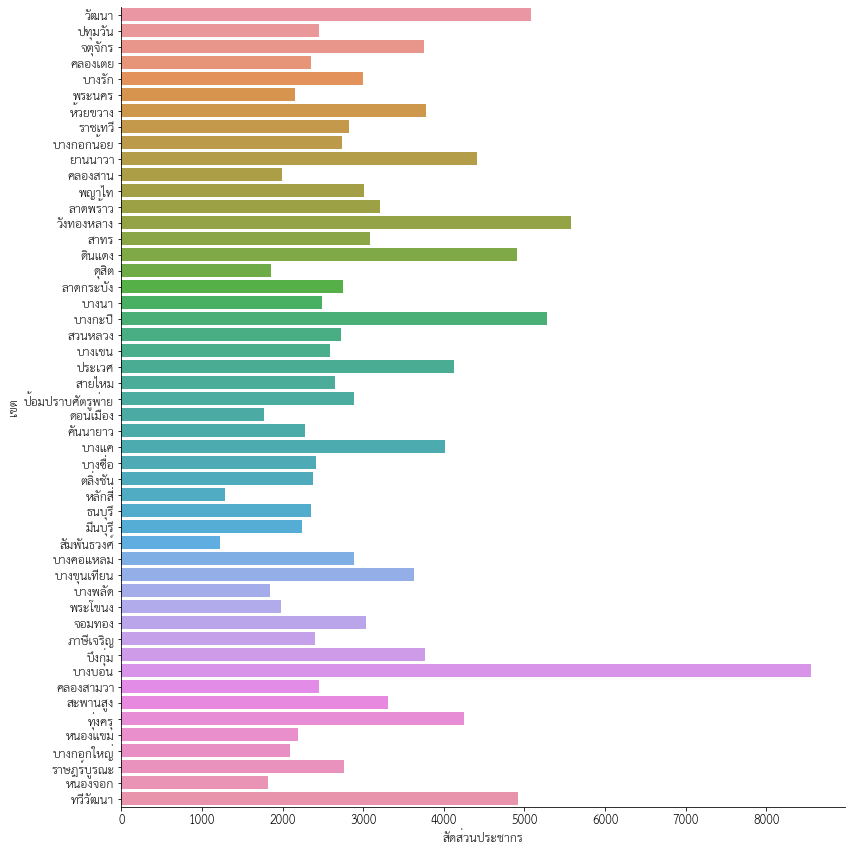

In [13]:
sns.factorplot(x="สัดส่วนประชากร", y="เขต", data = df_food, kind = 'bar', size=12, aspect=1.0)

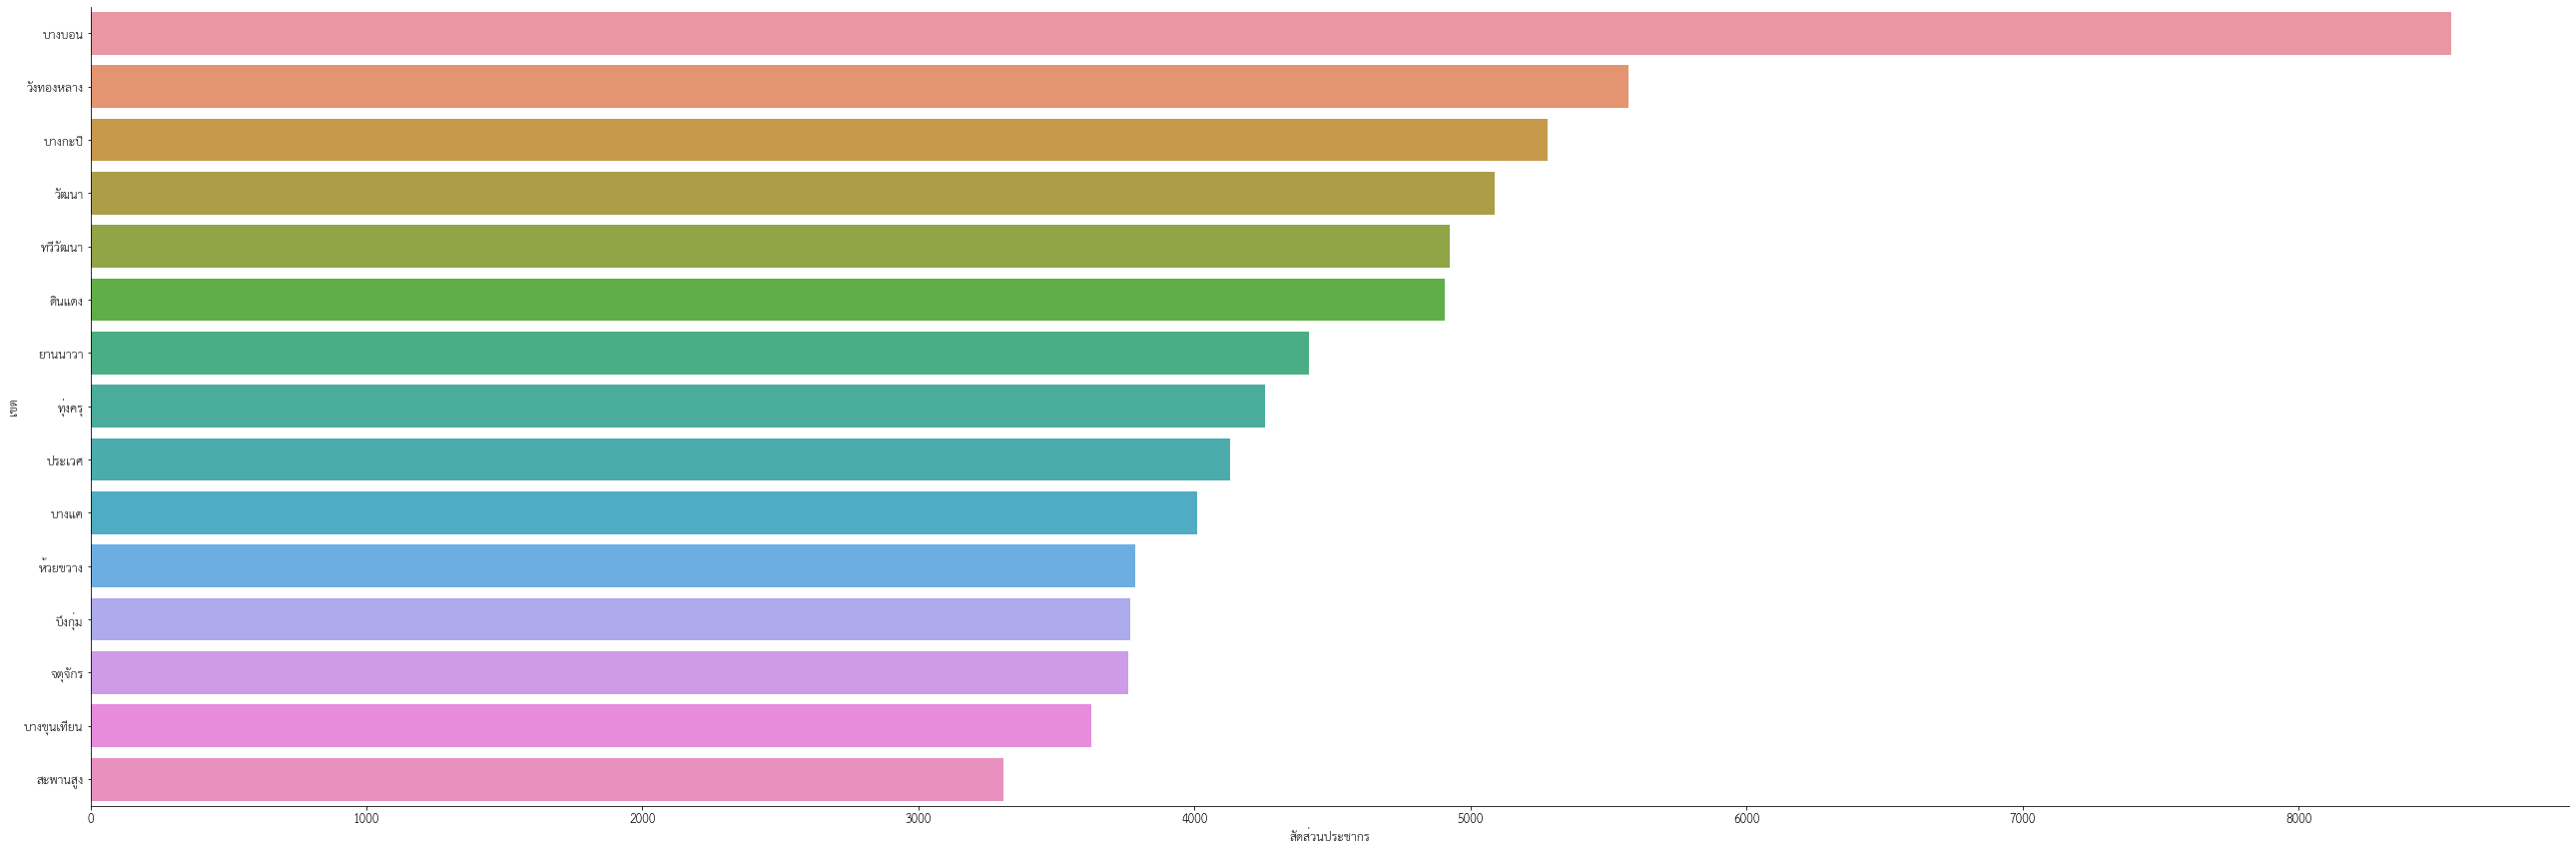

In [17]:
sns.factorplot(x="สัดส่วนประชากร", y="เขต", data = df_food.sort_values('สัดส่วนประชากร', ascending=False).iloc[0:15], kind = 'bar', size=12, aspect=3.0)

In [19]:
ppl_sort = df_food.sort_values('สัดส่วนประชากร', ascending=False).iloc[0:25]
ppl_sort

,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด,รวม,สัดส่วนประชากร
41,42,บางบอน,102635,34.750,12,79,3,76,0,13,171,8552.916667
13,14,วังทองหลาง,105901,19.265,19,317,3,125,0,11,456,5573.736842
19,20,บางกะปิ,142574,28.523,27,232,8,132,0,13,385,5280.518519
0,1,วัฒนา,81382,12.565,16,1195,24,127,0,6,"1,352",5086.375000
49,50,ทวีวัฒนา,78798,50.219,16,41,1,40,0,16,98,4924.875000
15,16,ดินแดง,112814,8.354,23,317,4,103,0,6,430,4904.956522
9,10,ยานนาวา,75076,16.662,17,508,6,74,60,7,655,4416.235294
44,45,ทุ่งครุ,123392,30.741,29,86,3,47,0,6,142,4254.896552
22,23,ประเวศ,181632,52.490,44,212,7,107,0,13,339,4128.000000
27,28,บางแค,192431,44.456,48,155,5,117,0,19,296,4008.979167


In [20]:
df_set = df_location.set_index('เขต')

In [21]:
df_newset = df_set.sort_values('รวม (จุด)', ascending=True).iloc[0:25]
df_newset

,สะพานลอยคนเดินข้าม,ป้ายรถโดยสารประจำทาง,สวนสาธารณะ,ตึก/อาคาร/บ้านสำหรับที่พักอาศัย,ที่ดิน(ว่างเปล่า),สะพาน,ถนน,ทางเท้า,ตรอก/ซอย,ชุมชน/หมู่บ้าน,...,สถานศึกษา,สถานที่ราชการ,จุดตัดทางแยก,ท่าเรือ,ทางเดินริมน้ำ,สถานีรถไฟฟ้า,อุโมงค์ลอดข้ามทางแยก/ถนน,สถานีขนส่ง,ศาสนสถาน,รวม (จุด)
เขต,,,,,,,,,,,,,,,,,,,,,
คลองสามวา,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ธนบุรี,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ดอนเมือง,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
หนองจอก,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
สาทร,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
วัฒนา,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2
สวนหลวง,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
คันนายาว,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
จอมทอง,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,3


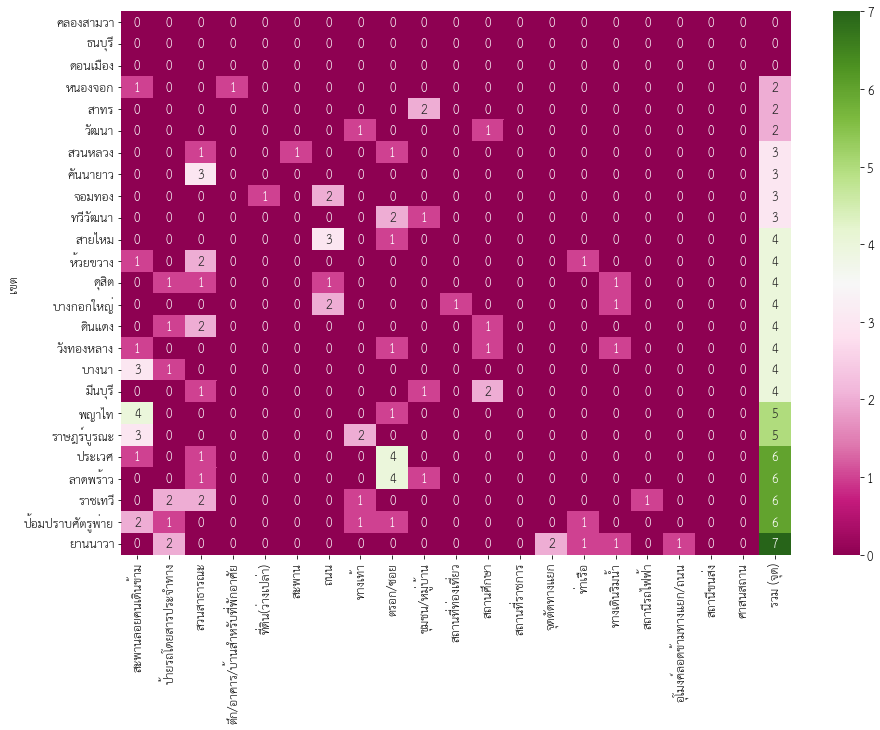

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_newset, annot=True, cmap="PiYG")

In [23]:
df_set2 = df_environment.set_index('เขต')

In [24]:
df_newset2 = df_set2.sort_values('รวม', ascending=True).iloc[0:25]
df_newset2

,เปลี่ยวช่วงกลางคืน,เปลี่ยวช่วงกลางวัน,จุดอับสายตา,รกร้าง,สกปรก,โครงสร้างมีสภาพชำรุด,ไฟชำรุด,วัสดุอุปกรณ์/รถจอดขวางทางสัญจร,คนไร้บ้าน,แหล่งมั่วสุม,...,อุบัติเหตุจากป้าย,อุบัติเหตุจากต้นไม้,อุบัติเหตุอื่น ๆ,ก่อกวน/ยกพวกตีกัน/แข่งรถ,ประชาชนพลุกพล่าน,ภัยอันตรายจากสัตว์มีพิษ,สถานที่สำคัญ,ภัยอันตราย/คุกคามทางเพศ,แหล่งสะสมเชื้อโรค,รวม
เขต,,,,,,,,,,,,,,,,,,,,,
บางเขน,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
สายไหม,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
พญาไท,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,1,0,0,5
ทวีวัฒนา,4,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
มีนบุรี,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
ลาดพร้าว,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
ราษฎร์บูรณะ,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
คลองสามวา,2,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
ทุ่งครุ,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7


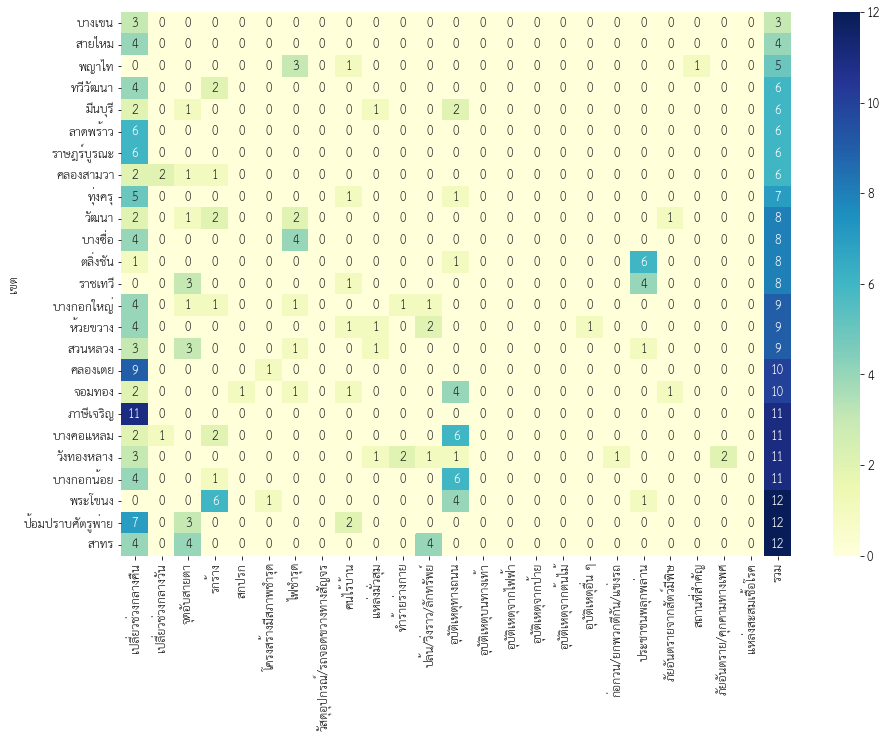

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_newset2, annot=True, cmap="YlGnBu")

In [28]:
danger = pd.merge(df_newset,df_newset2,on='เขต')
danger['ทั้งหมด'] = danger['รวม (จุด)'] +danger['รวม']
del danger['รวม (จุด)'] 
del danger['รวม']
danger

,สะพานลอยคนเดินข้าม,ป้ายรถโดยสารประจำทาง,สวนสาธารณะ,ตึก/อาคาร/บ้านสำหรับที่พักอาศัย,ที่ดิน(ว่างเปล่า),สะพาน,ถนน,ทางเท้า,ตรอก/ซอย,ชุมชน/หมู่บ้าน,...,อุบัติเหตุจากป้าย,อุบัติเหตุจากต้นไม้,อุบัติเหตุอื่น ๆ,ก่อกวน/ยกพวกตีกัน/แข่งรถ,ประชาชนพลุกพล่าน,ภัยอันตรายจากสัตว์มีพิษ,สถานที่สำคัญ,ภัยอันตราย/คุกคามทางเพศ,แหล่งสะสมเชื้อโรค,ทั้งหมด
เขต,,,,,,,,,,,,,,,,,,,,,
คลองสามวา,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
สาทร,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,14
วัฒนา,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,10
สวนหลวง,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,12
จอมทอง,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,13
ทวีวัฒนา,0,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,9
สายไหม,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,8
ห้วยขวาง,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13
บางกอกใหญ่,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,13


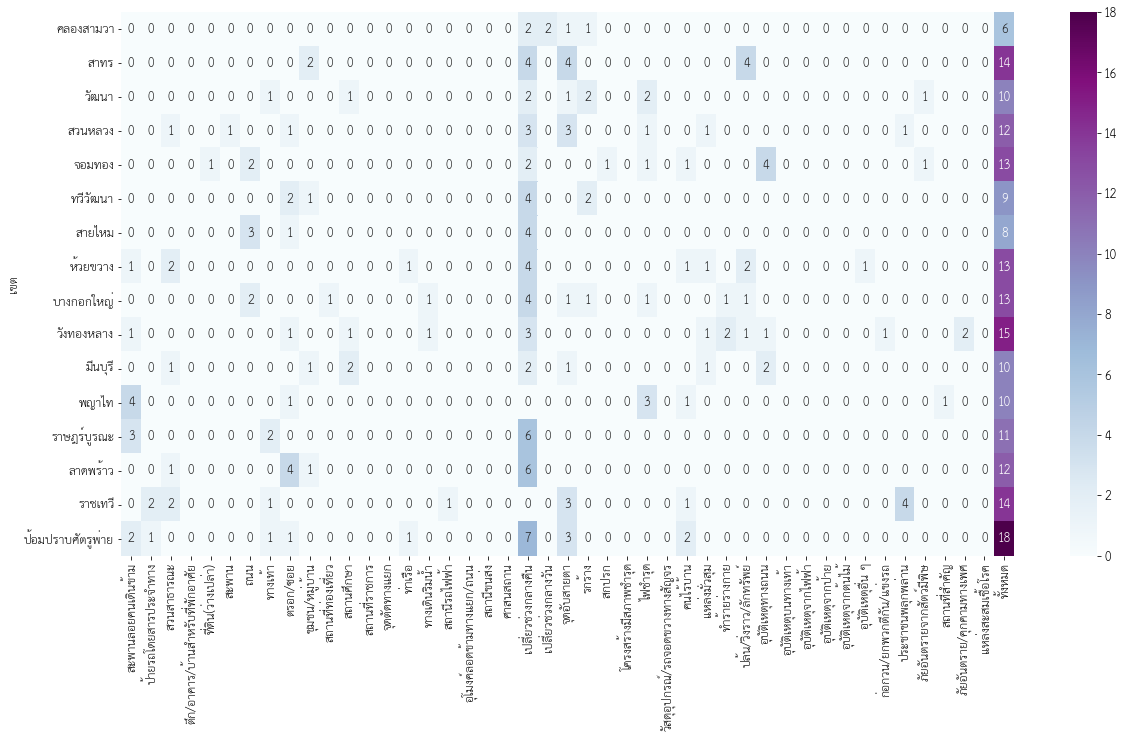

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(danger, annot=True, cmap="BuPu")

In [34]:
df_busline

,เขต,จำนวนรถเมล์ที่ผ่าน,จำนวนต้นทาง,จำนวนปลายทาง,ประชากร,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน
0,พระนคร,58,6,32,43062,5.536,7778.540462,717.700000,40,17
1,จตุจักร,57,6,20,154146,32.908,4684.149751,2569.100000,38,17
2,ราชเทวี,64,7,15,67735,7.126,9505.332585,996.102941,47,14
3,ปทุมวัน,46,6,12,41763,8.369,4990.201936,835.260000,33,13
4,ดุสิต,39,3,9,81494,10.665,7641.256446,1987.658537,27,11
5,ตลิ่งชัน,19,7,8,102469,29.479,3475.999864,4879.476190,11,8
6,บางนา,27,16,7,87053,18.790,4632.943055,3224.185185,19,8
7,หลักสี่,21,5,7,100534,22.841,4401.471039,5026.700000,12,9
8,ยานนาวา,11,2,6,75076,16.662,4505.821630,6825.090909,9,2
9,คลองสาน,22,1,6,67579,6.051,11168.236660,2938.217391,14,8


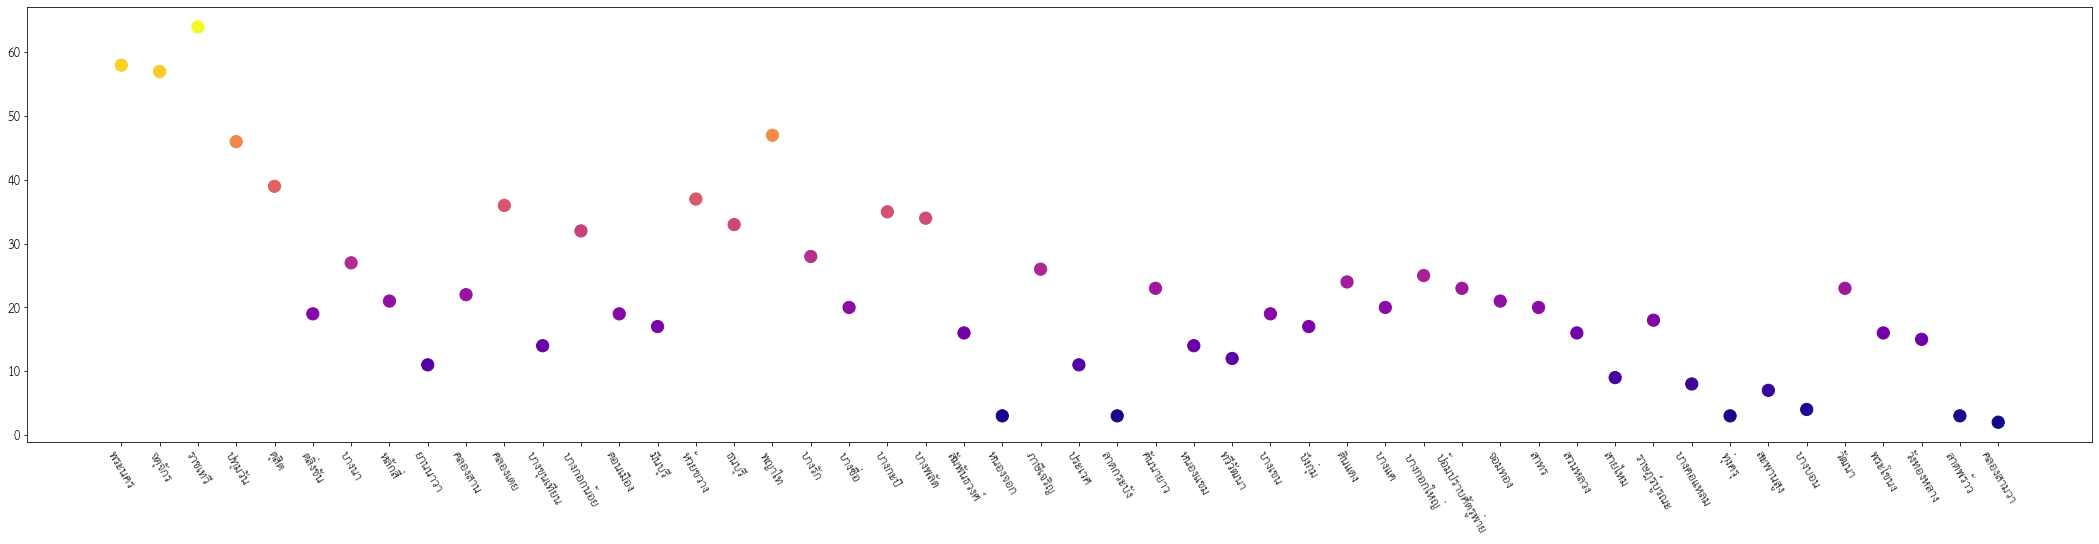

In [42]:
plt.figure(figsize=(37, 8))
#sns.scatterplot(x="เขต", y="จำนวนรถเมล์ที่ผ่าน", data= df_busline, size = 500, cmap="RdYlGn",edgecolors="black")
plt.scatter(x="เขต", y="จำนวนรถเมล์ที่ผ่าน", data=df_busline, s = 150, cmap="plasma", c="จำนวนรถเมล์ที่ผ่าน")
plt.xticks(rotation = 300)
plt.show()

In [39]:
df_busTest = df_busline.sort_values('จำนวนรถเมล์ที่ผ่าน', ascending=False).iloc[0:25]

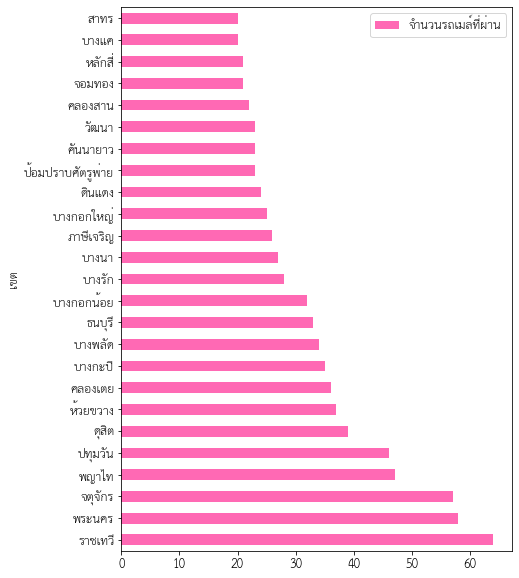

In [44]:
df_busTest.plot(x="เขต", y=["จำนวนรถเมล์ที่ผ่าน"],
        kind="barh",figsize=(7, 10), color='hotpink')

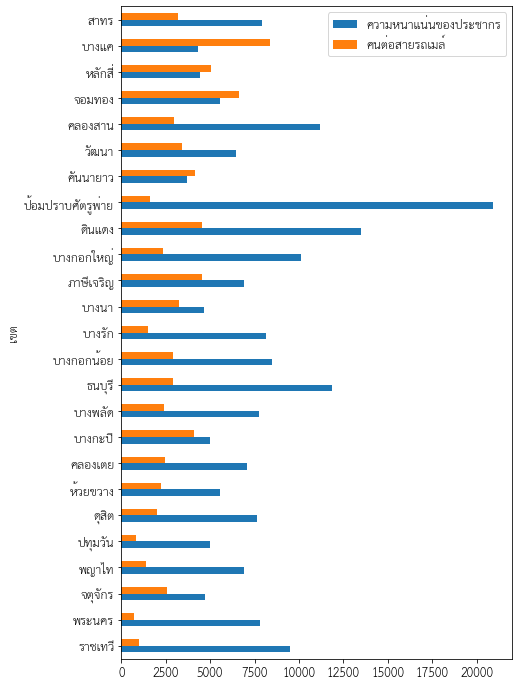

In [46]:
df_busTest.plot(x="เขต", y=["ความหนาแน่นของประชากร", "คนต่อสายรถเมล์"],
        kind="barh",figsize=(7, 12))

In [47]:
df_type = df_food.iloc[:,[1,5,6,7,8,9]]
df_type

,เขต,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด
0,วัฒนา,1195,24,127,0,6
1,ปทุมวัน,1027,12,74,72,1
2,จตุจักร,792,7,172,0,5
3,คลองเตย,697,11,61,79,1
4,บางรัก,597,7,57,98,1
5,พระนคร,605,2,62,67,4
6,ห้วยขวาง,512,10,182,0,4
7,ราชเทวี,599,1,93,0,1
8,บางกอกน้อย,323,9,71,271,8
9,ยานนาวา,508,6,74,60,7


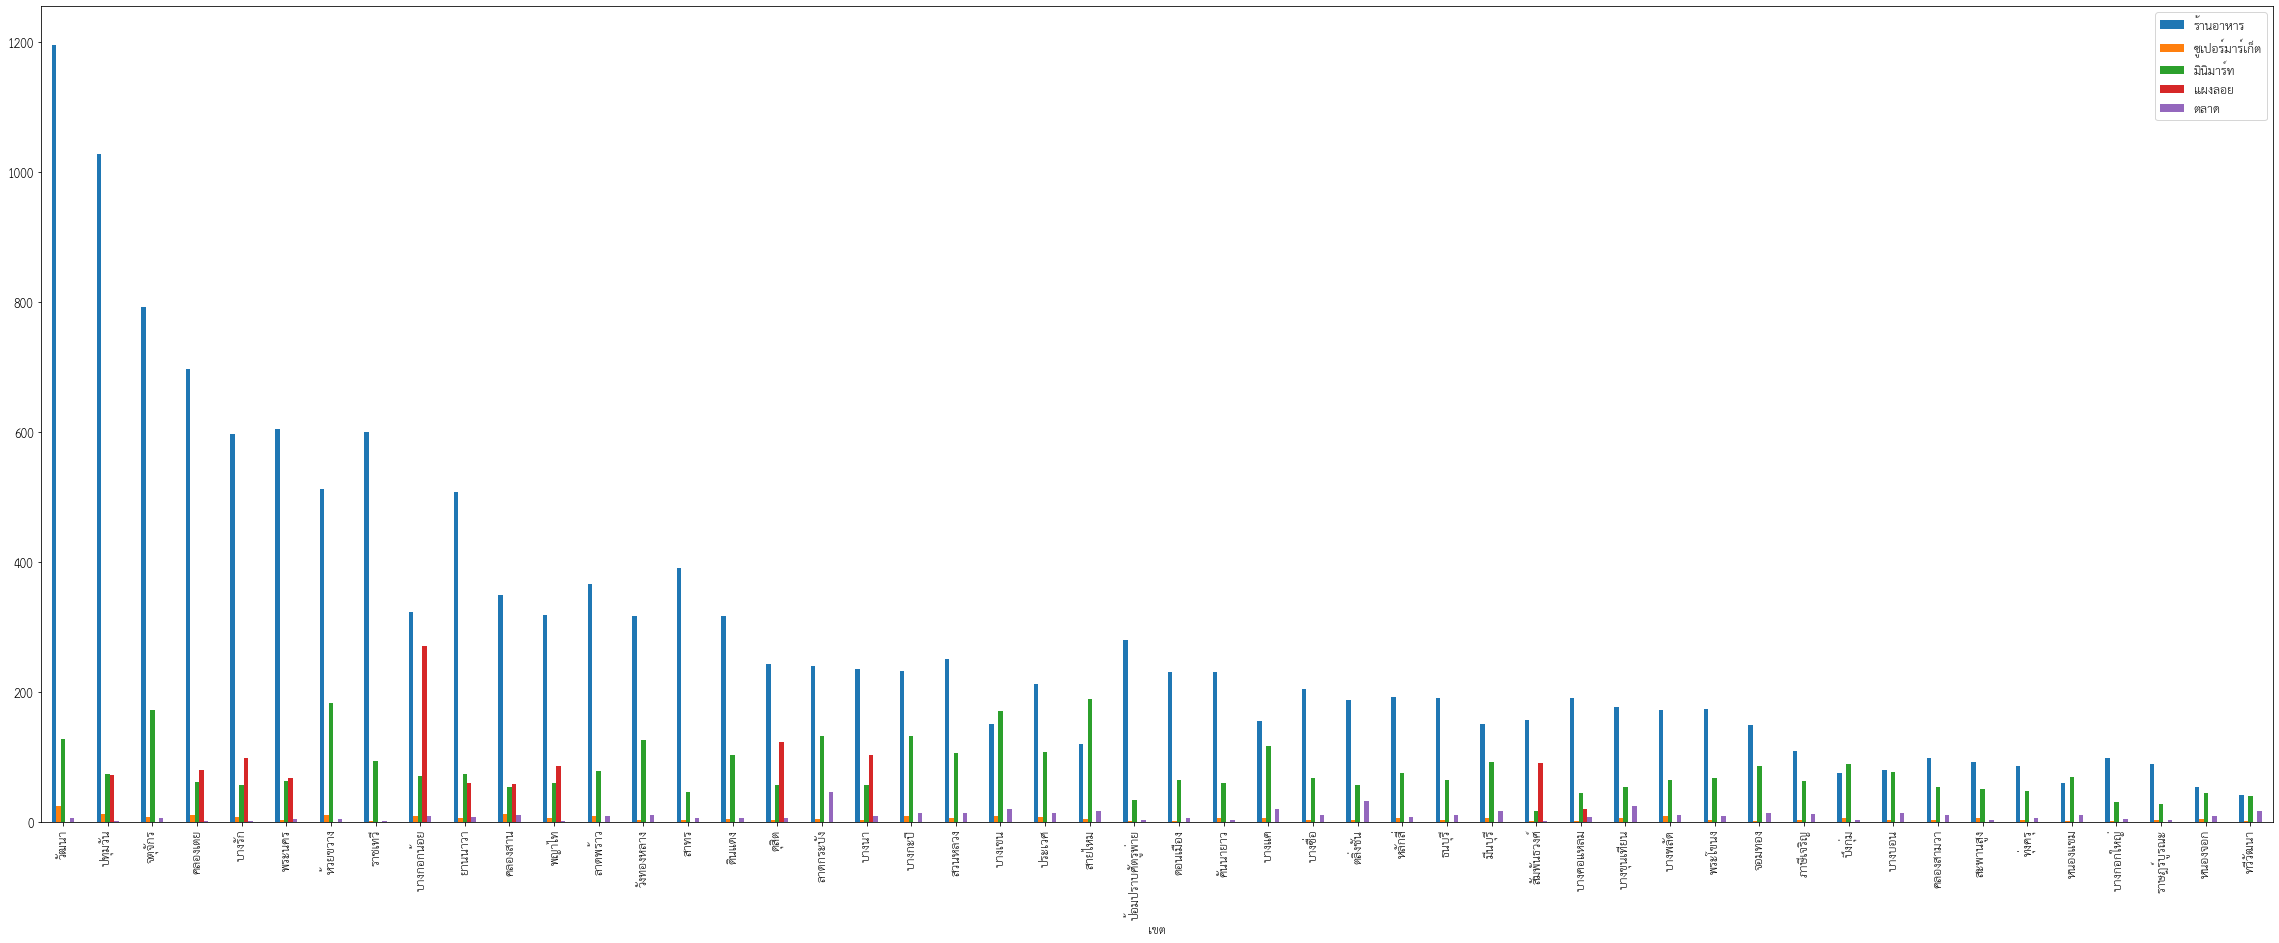

In [48]:
df_type.plot(x="เขต", y=["ร้านอาหาร", "ซูเปอร์มาร์เก็ต", "มินิมาร์ท",	"แผงลอย",	"ตลาด"],
        kind="bar", figsize=(40, 15))

In [49]:
df_type2 = df_type.sort_values(by=['ตลาด','ซูเปอร์มาร์เก็ต'], ascending=False)
df_typeList = df_type2.iloc[0:25]

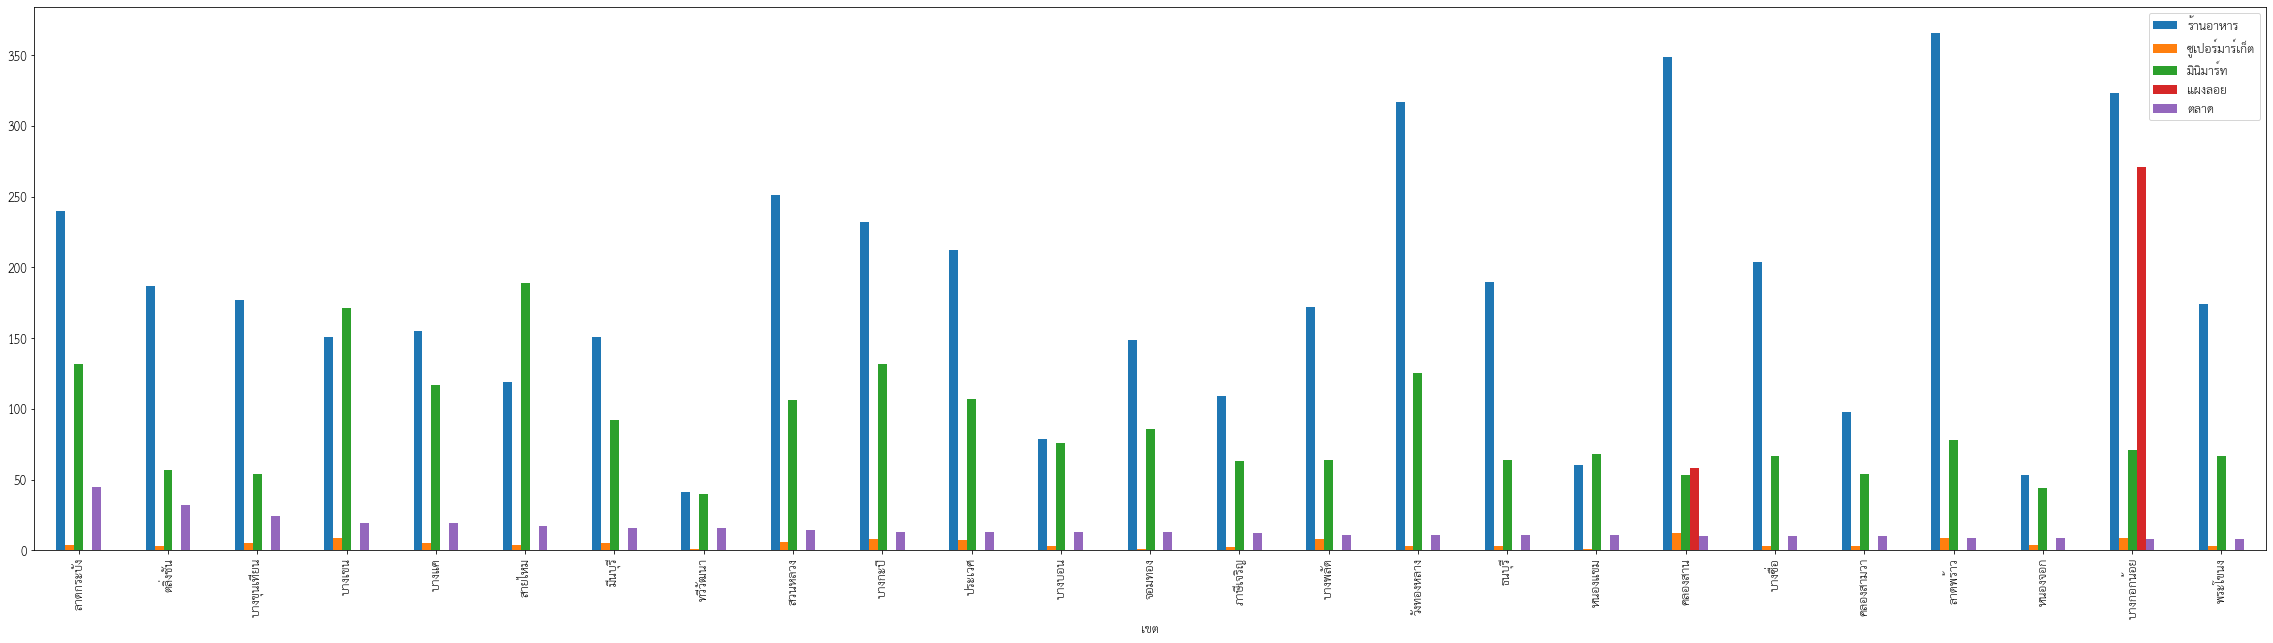

In [53]:
df_typeList.plot(x="เขต", y=["ร้านอาหาร", "ซูเปอร์มาร์เก็ต", "มินิมาร์ท",	"แผงลอย",	"ตลาด"],
        kind="bar", figsize=(40, 10))

In [54]:
result = pd.merge(ppl_sort,df_busTest,on=('เขต','ประชากร'))
result

,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด,รวม,สัดส่วนประชากร,จำนวนรถเมล์ที่ผ่าน,จำนวนต้นทาง,จำนวนปลายทาง,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน
0,20,บางกะปิ,142574,28.523,27,232,8,132,0,13,385,5280.518519,35,9,3,28.523,4998.562564,4073.542857,22,12
1,1,วัฒนา,81382,12.565,16,1195,24,127,0,6,"1,352",5086.375000,23,0,0,12.565,6476.880223,3390.916667,15,8
2,16,ดินแดง,112814,8.354,23,317,4,103,0,6,430,4904.956522,24,1,1,8.354,13504.189610,4512.560000,20,4
3,28,บางแค,192431,44.456,48,155,5,117,0,19,296,4008.979167,20,1,1,44.456,4328.572071,8366.565217,16,4
4,7,ห้วยขวาง,83278,15.033,22,512,10,182,0,4,708,3785.363636,37,7,4,15.033,5539.679372,2250.756757,28,7
5,3,จตุจักร,154146,32.908,41,792,7,172,0,5,976,3759.658537,57,6,20,32.908,4684.149751,2569.100000,38,17
6,15,สาทร,73987,9.326,24,390,3,45,0,5,443,3082.791667,20,0,1,9.326,7933.411967,3216.826087,12,8
7,39,จอมทอง,145771,26.265,48,149,1,86,0,13,249,3036.895833,21,0,1,26.265,5550.009518,6625.954545,15,6
8,12,พญาไท,66212,9.600,22,318,6,60,85,1,470,3009.636364,47,1,4,9.600,6897.083333,1379.416667,33,12
9,5,บางรัก,45015,5.536,15,597,7,57,98,1,760,3001.000000,28,1,4,5.536,8131.322254,1500.500000,18,10


In [56]:
result2 = pd.merge(result,df_typeList,on=('เขต','ร้านอาหาร','ซูเปอร์มาร์เก็ต','มินิมาร์ท','แผงลอย','ตลาด'))
result2

,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด,รวม,สัดส่วนประชากร,จำนวนรถเมล์ที่ผ่าน,จำนวนต้นทาง,จำนวนปลายทาง,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน
0,20,บางกะปิ,142574,28.523,27,232,8,132,0,13,385,5280.518519,35,9,3,28.523,4998.562564,4073.542857,22,12
1,28,บางแค,192431,44.456,48,155,5,117,0,19,296,4008.979167,20,1,1,44.456,4328.572071,8366.565217,16,4
2,39,จอมทอง,145771,26.265,48,149,1,86,0,13,249,3036.895833,21,0,1,26.265,5550.009518,6625.954545,15,6


In [65]:
final_result = pd.merge(result2,danger,on='เขต')
final_result

,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,แผงลอย,ตลาด,รวม,สัดส่วนประชากร,จำนวนรถเมล์ที่ผ่าน,จำนวนต้นทาง,จำนวนปลายทาง,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน,สะพานลอยคนเดินข้าม,ป้ายรถโดยสารประจำทาง,สวนสาธารณะ,ตึก/อาคาร/บ้านสำหรับที่พักอาศัย,ที่ดิน(ว่างเปล่า),สะพาน,ถนน,ทางเท้า,ตรอก/ซอย,ชุมชน/หมู่บ้าน,สถานที่ท่องเที่ยว,สถานศึกษา,สถานที่ราชการ,จุดตัดทางแยก,ท่าเรือ,ทางเดินริมน้ำ,สถานีรถไฟฟ้า,อุโมงค์ลอดข้ามทางแยก/ถนน,สถานีขนส่ง,ศาสนสถาน,เปลี่ยวช่วงกลางคืน,เปลี่ยวช่วงกลางวัน,จุดอับสายตา,รกร้าง,สกปรก,โครงสร้างมีสภาพชำรุด,ไฟชำรุด,วัสดุอุปกรณ์/รถจอดขวางทางสัญจร,คนไร้บ้าน,แหล่งมั่วสุม,ทำร้ายร่างกาย,ปล้น/วิ่งราว/ลักทรัพย์,อุบัติเหตุทางถนน,อุบัติเหตุบนทางเท้า,อุบัติเหตุจากไฟฟ้า,อุบัติเหตุจากป้าย,อุบัติเหตุจากต้นไม้,อุบัติเหตุอื่น ๆ,ก่อกวน/ยกพวกตีกัน/แข่งรถ,ประชาชนพลุกพล่าน,ภัยอันตรายจากสัตว์มีพิษ,สถานที่สำคัญ,ภัยอันตราย/คุกคามทางเพศ,แหล่งสะสมเชื้อโรค,ทั้งหมด
0,39,จอมทอง,145771,26.265,48,149,1,86,0,13,249,3036.895833,21,0,1,26.265,5550.009518,6625.954545,15,6,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,1,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,13


In [67]:
final_result = final_result.loc[:, (final_result != 0).any()]
#pd.set_option('display.max_columns', None)
final_result

,อันดับ (ดี-แย่),เขต,ประชากร,พื้นที่,จำนวนชุมชน,ร้านอาหาร,ซูเปอร์มาร์เก็ต,มินิมาร์ท,ตลาด,รวม,สัดส่วนประชากร,จำนวนรถเมล์ที่ผ่าน,จำนวนปลายทาง,พื้นที่ตารางกม.,ความหนาแน่นของประชากร,คนต่อสายรถเมล์,จำนวนสายขสมก,จำนวนสายเอกชน,ที่ดิน(ว่างเปล่า),ถนน,เปลี่ยวช่วงกลางคืน,สกปรก,ไฟชำรุด,คนไร้บ้าน,อุบัติเหตุทางถนน,ภัยอันตรายจากสัตว์มีพิษ,ทั้งหมด
0,39,จอมทอง,145771,26.265,48,149,1,86,13,249,3036.895833,21,1,26.265,5550.009518,6625.954545,15,6,1,2,2,1,1,1,4,1,13


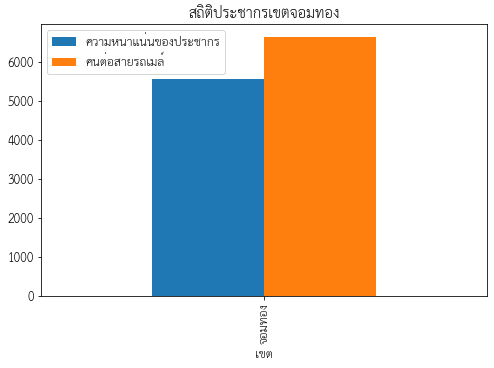

In [79]:
final_result.plot(x="เขต", y=["ความหนาแน่นของประชากร","คนต่อสายรถเมล์"],
        kind="bar",figsize=(8, 5), title="สถิติประชากรเขตจอมทอง")

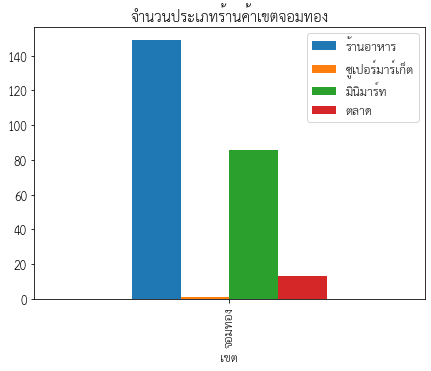

In [81]:
final_result.plot(x="เขต", y=["ร้านอาหาร",'ซูเปอร์มาร์เก็ต','มินิมาร์ท','ตลาด'],
        kind="bar",figsize=(7, 5), title="จำนวนประเภทร้านค้าเขตจอมทอง")

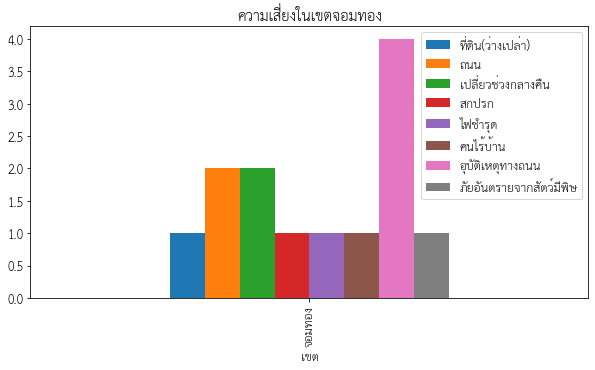

In [94]:
final_result.plot(x="เขต", y=["ที่ดิน(ว่างเปล่า)",	"ถนน",	"เปลี่ยวช่วงกลางคืน",	"สกปรก",	"ไฟชำรุด",	"คนไร้บ้าน","อุบัติเหตุทางถนน",	"ภัยอันตรายจากสัตว์มีพิษ"	],
        kind="bar",figsize=(10, 5), title="ความเสี่ยงในเขตจอมทอง")